# Import PEPA module

In [1]:
import sys
PEPA_repository_path = f"/home/emmanuel/test/PEPA"
sys.path.insert(0,PEPA_repository_path)

# Libraries

In [2]:
from PEPA.dataset.tt import ReadTraveltime
from obspy import UTCDateTime

# Get picks

In [3]:
hdf_path = "/home/emmanuel/results/PEPA/col"
tt_paths = {"P":f"{hdf_path}/tt/P_tt.h5",
            "S":f"{hdf_path}/tt/S_tt.h5" }

tt = ReadTraveltime(tt_paths)

available stations

In [4]:
tt.stations

{'P': ['CM.APAC.P',
  'CM.ARGC.P',
  'CM.BAR2.P',
  'CM.BBAC.P',
  'CM.BET.P',
  'CM.BRJC.P',
  'CM.CAP2.P',
  'CM.CBETA.P',
  'CM.CBOC.P',
  'CM.CHI.P',
  'CM.CPOP2.P',
  'CM.CPRAD.P',
  'CM.CRJC.P',
  'CM.CRU.P',
  'CM.CUM.P',
  'CM.DBB.P',
  'CM.FLO2.P',
  'CM.GARC.P',
  'CM.GR1C.P',
  'CM.GUA.P',
  'CM.GUY2C.P',
  'CM.HEL.P',
  'CM.JAMC.P',
  'CM.LCBC.P',
  'CM.MACC.P',
  'CM.MAL.P',
  'CM.MAP.P',
  'CM.NOR.P',
  'CM.OCA.P',
  'CM.ORTC.P',
  'CM.PAL.P',
  'CM.PAM.P',
  'CM.PIZC.P',
  'CM.POP2.P',
  'CM.PRA.P',
  'CM.PRV.P',
  'CM.PTA.P',
  'CM.PTB.P',
  'CM.PTGC.P',
  'CM.PTLC.P',
  'CM.QUBC.P',
  'CM.RNCC.P',
  'CM.RUS.P',
  'CM.SAIC.P',
  'CM.SERC.P',
  'CM.SJC.P',
  'CM.SMAR.P',
  'CM.SOL.P',
  'CM.SPBC.P',
  'CM.TAM.P',
  'CM.TUM.P',
  'CM.TUM3C.P',
  'CM.URE.P',
  'CM.URI.P',
  'CM.URMC.P',
  'CM.VIL.P',
  'CM.YOT.P',
  'CM.YPLC.P',
  'CM.ZAR.P',
  'YU.CS01.P',
  'YU.CS02.P',
  'YU.CS03.P',
  'YU.CS04.P',
  'YU.CS05.P',
  'YU.CS06.P',
  'YU.CS07.P',
  'YU.CS08.P',
  'YU.FC01.P

available depths

In [5]:
tt.depths

{'P': ['-1.0',
  '-2.0',
  '-3.0',
  '-4.0',
  '-5.0',
  '0.0',
  '1.0',
  '10.0',
  '100.0',
  '101.0',
  '102.0',
  '103.0',
  '104.0',
  '105.0',
  '106.0',
  '107.0',
  '108.0',
  '109.0',
  '11.0',
  '110.0',
  '111.0',
  '112.0',
  '113.0',
  '114.0',
  '115.0',
  '116.0',
  '117.0',
  '118.0',
  '119.0',
  '12.0',
  '120.0',
  '121.0',
  '122.0',
  '123.0',
  '124.0',
  '125.0',
  '126.0',
  '127.0',
  '128.0',
  '129.0',
  '13.0',
  '130.0',
  '131.0',
  '132.0',
  '133.0',
  '134.0',
  '135.0',
  '136.0',
  '137.0',
  '138.0',
  '139.0',
  '14.0',
  '140.0',
  '141.0',
  '142.0',
  '143.0',
  '144.0',
  '145.0',
  '146.0',
  '147.0',
  '148.0',
  '149.0',
  '15.0',
  '150.0',
  '151.0',
  '152.0',
  '153.0',
  '154.0',
  '155.0',
  '156.0',
  '157.0',
  '158.0',
  '159.0',
  '16.0',
  '160.0',
  '161.0',
  '162.0',
  '163.0',
  '164.0',
  '165.0',
  '166.0',
  '167.0',
  '168.0',
  '169.0',
  '17.0',
  '170.0',
  '171.0',
  '172.0',
  '173.0',
  '174.0',
  '175.0',
  '176.0',


# Test

In [6]:
from PEPA.dataset.utils import get_picks
sf = "/home/emmanuel/test/PEPA/dataset/sgc_events/SGC2022ciilif.xml" 
sgc_picks = get_picks(sf)
sgc_picks.head(20)

,id,network,station,P_tt,S_tt
0,SGC2022ciilif,CM,BAR2,2022-02-02T20:43:20.317770Z,2022-02-02T20:43:35.569778Z
1,SGC2022ciilif,CM,BRJC,2022-02-02T20:43:21.919798Z,2022-02-02T20:43:38.967742Z
2,SGC2022ciilif,CM,PAM,2022-02-02T20:43:23.358544Z,2022-02-02T20:43:40.264868Z
3,SGC2022ciilif,CM,RUS,2022-02-02T20:43:24.208687Z,2022-02-02T20:43:42.757412Z
4,SGC2022ciilif,CM,PTB,2022-02-02T20:43:26.647375Z,2022-02-02T20:43:47.974086Z
5,SGC2022ciilif,CM,SPBC,2022-02-02T20:43:28.989966Z,2022-02-02T20:43:50.721230Z
6,SGC2022ciilif,CM,YPLC,2022-02-02T20:43:30.781296Z,2022-02-02T20:43:54.497087Z
7,SGC2022ciilif,CM,CHI,2022-02-02T20:43:38.528976Z,2022-02-02T20:44:07.810323Z
8,SGC2022ciilif,CM,ZAR,2022-02-02T20:43:33.661773Z,2022-02-02T20:43:58.052242Z
9,SGC2022ciilif,CM,TABC,2022-02-02T20:43:37.062177Z,2022-02-02T20:44:05.223891Z


In [10]:
data = tt.get_traveltimes(dep =142,lat=6.78,lon=-73.2,
                            networks=["CM"],stations=["BAR2","BRJC","PAM","RUS","PTB","SPBC"],
                            # origin=UTCDateTime("2022-02-02 20:42:59") )
                            origin=UTCDateTime("2022-02-02 20:43:01") ) 
data

,network,station,P_tt,P_veracity,S_tt,S_veracity
0,CM,BAR2,2022-02-02 20:43:20.496132755,1,2022-02-02 20:43:35.703340064,1
1,CM,BRJC,2022-02-02 20:43:21.689358599,1,2022-02-02 20:43:37.827287932,1
2,CM,PAM,2022-02-02 20:43:23.562971973,1,2022-02-02 20:43:41.162355265,1
3,CM,RUS,2022-02-02 20:43:24.537728377,1,2022-02-02 20:43:42.897439622,1
4,CM,PTB,2022-02-02 20:43:26.929881069,1,2022-02-02 20:43:47.155492395,1
5,CM,SPBC,2022-02-02 20:43:29.085999960,1,2022-02-02 20:43:50.993420151,1


In [11]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("http://sismo.sgc.gov.co:8080/")
st = client.get_waveforms(network="CM",station="BAR2,BRJC,PAM,RUS,PTB,SPBC",location="00",channel="HHZ",
                      starttime=UTCDateTime("2022-02-02 20:42:59"),
                      endtime=UTCDateTime("2022-02-02 20:43:59"))
st = st.sort(keys=["starttime"])
st = st.normalize()
st.detrend()
st.filter("bandpass",freqmin=4,freqmax=20)
st

5 Trace(s) in Stream:
CM.PTB.00.HHZ  | 2022-02-02T20:42:58.998391Z - 2022-02-02T20:43:58.998391Z | 100.0 Hz, 6001 samples
CM.SPBC.00.HHZ | 2022-02-02T20:42:58.998391Z - 2022-02-02T20:43:58.998391Z | 100.0 Hz, 6001 samples
CM.RUS.00.HHZ  | 2022-02-02T20:42:58.998393Z - 2022-02-02T20:43:58.998393Z | 100.0 Hz, 6001 samples
CM.BAR2.00.HHZ | 2022-02-02T20:42:58.998393Z - 2022-02-02T20:43:58.998393Z | 100.0 Hz, 6001 samples
CM.BRJC.00.HHZ | 2022-02-02T20:42:59.000000Z - 2022-02-02T20:43:59.000000Z | 100.0 Hz, 6001 samples

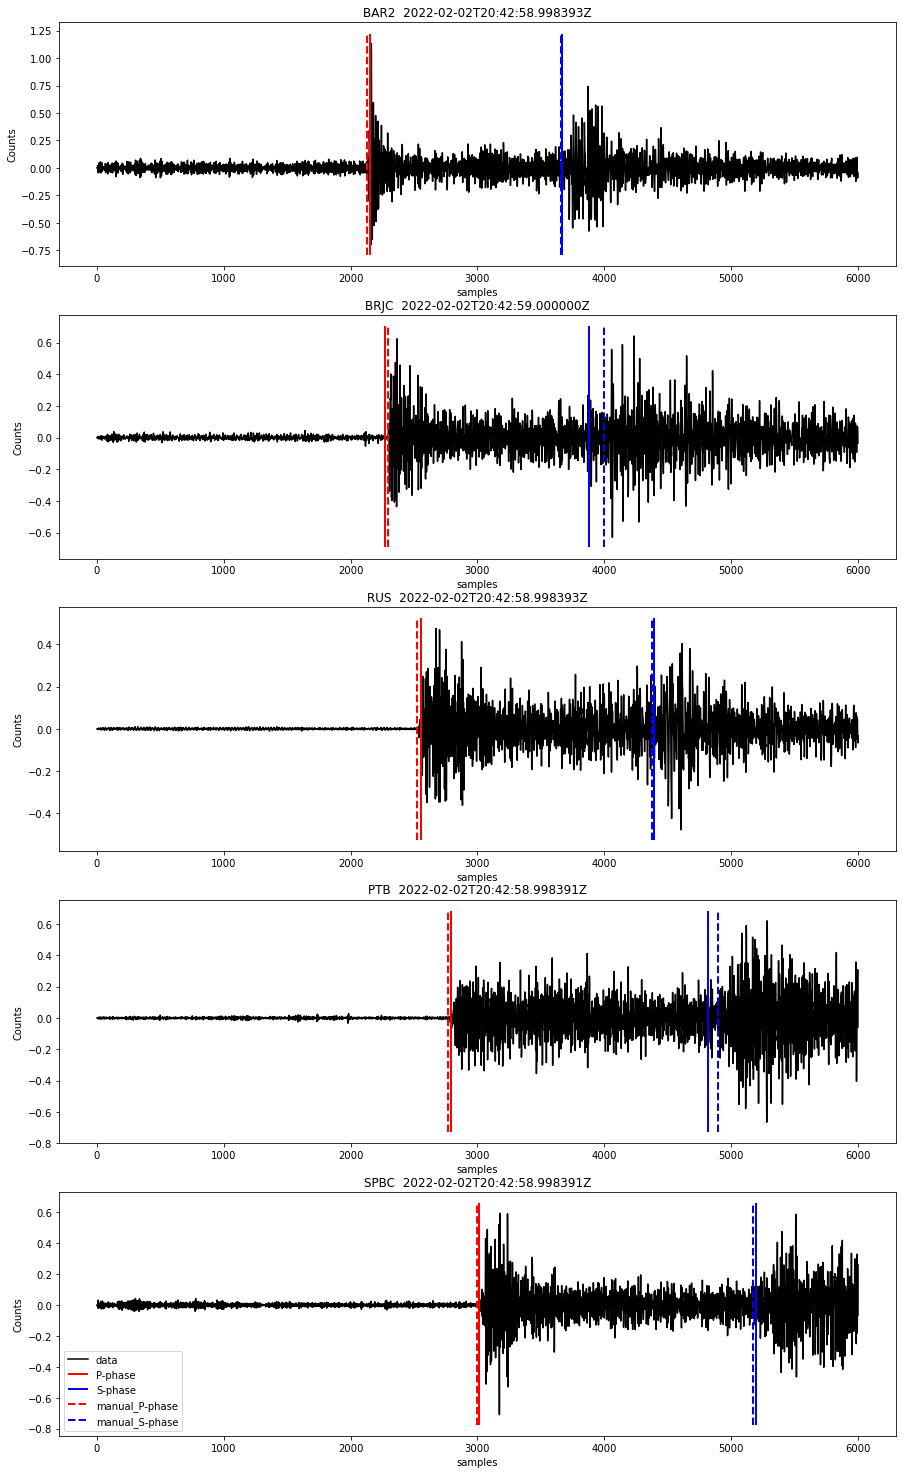

In [12]:
import matplotlib.pyplot as plt
from PEPA.dataset.utils import plot_stations

plot_stations(st,data,sgc_picks,figsize=(15,26))
plt.savefig("BAR2.png",dpi=300, facecolor='w', transparent=False)
plt.show()